In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report

In [ ]:
df= pd.read_csv("/content/Crop_recommendation.csv")

In [ ]:
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns=['Nitrogen','Phosphorus','Potassium','Temperature','Humidity','pH','Rainfall','Label']

In [ ]:
df.isna().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH             0
Rainfall       0
Label          0
dtype: int64

In [ ]:
df.describe()

Nitrogen   Phosphorus    Potassium  Temperature     Humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                pH     Rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [ ]:
df.shape

(2200, 8)

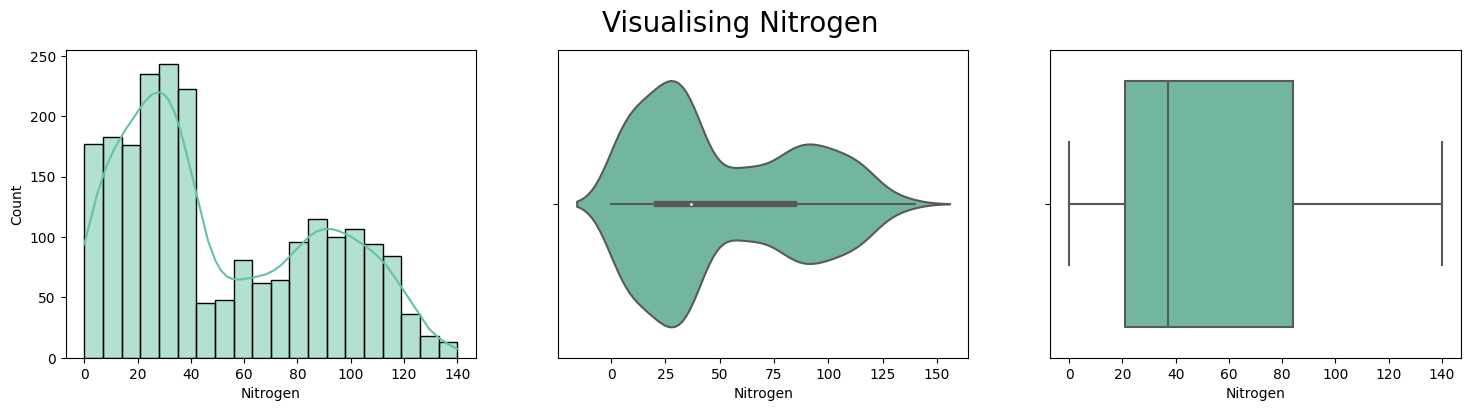

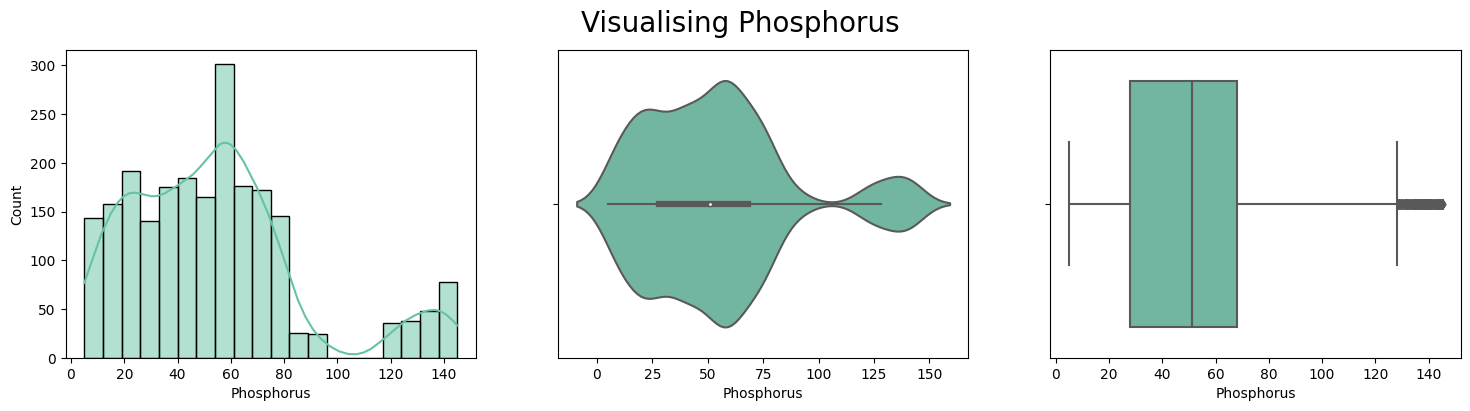

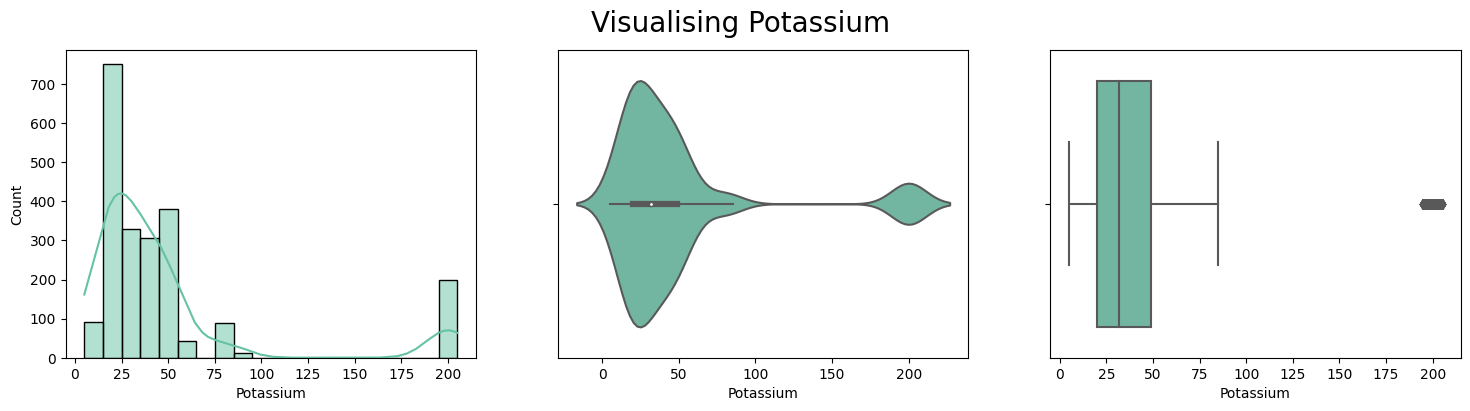

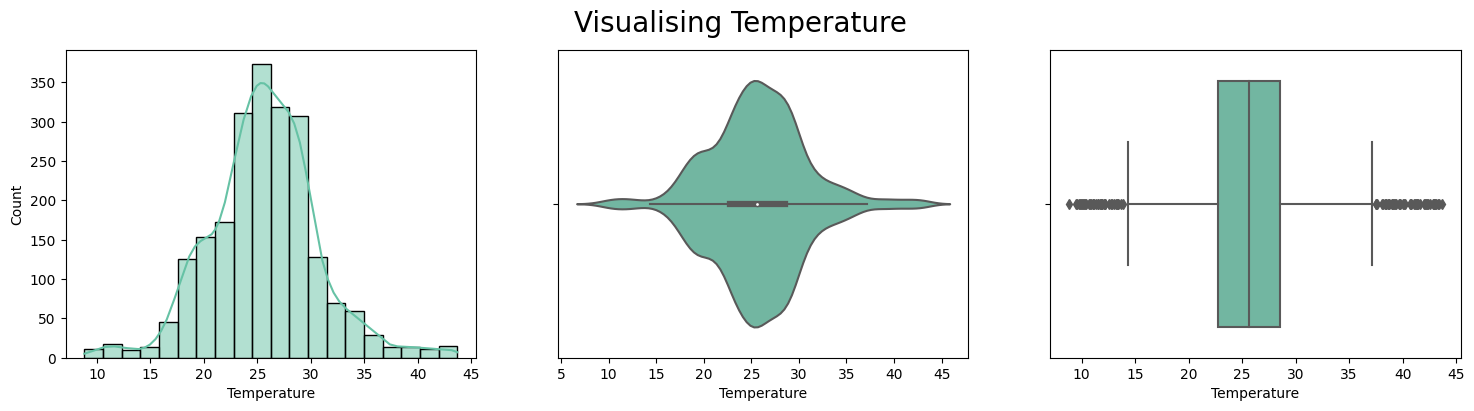

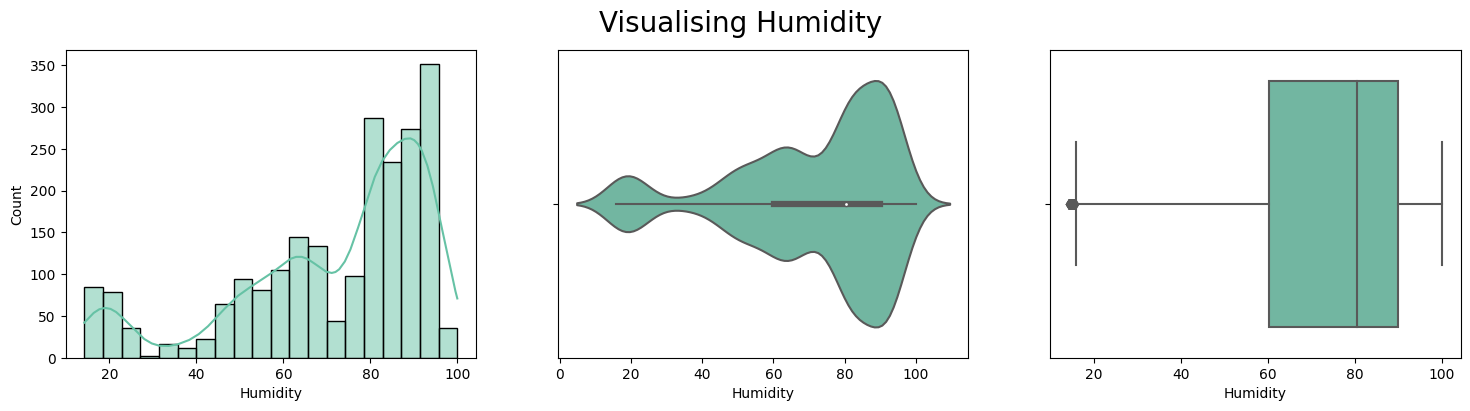

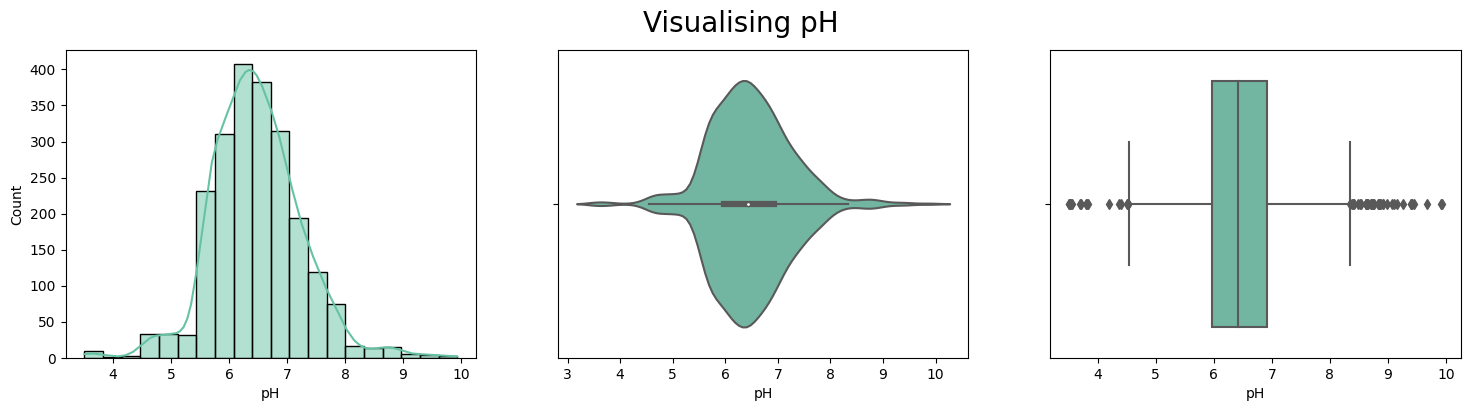

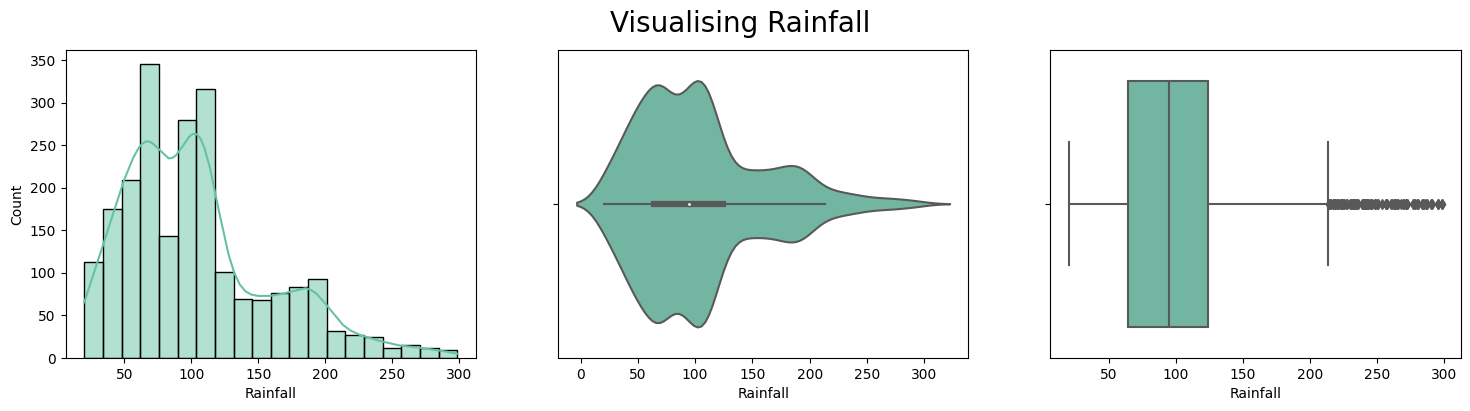

In [ ]:
plt.style.use('fast')
sns.set_palette("Set2")
for i in df.columns[:-1]:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=df,x=i,kde=True,bins=20, ax=ax[0])
    sns.violinplot(data=df,x=i,ax=ax[1])
    sns.boxplot(data=df,x=i,ax=ax[2])
    plt.suptitle(f'Visualising {i}',size=20)

In [ ]:
grouped=df.groupby(by='Label').mean().reset_index()
grouped

Label  Nitrogen  Phosphorus  Potassium  Temperature   Humidity  \
0         apple     20.80      134.22     199.89    22.630942  92.333383   
1        banana    100.23       82.01      50.05    27.376798  80.358123   
2     blackgram     40.02       67.47      19.24    29.973340  65.118426   
3      chickpea     40.09       67.79      79.92    18.872847  16.860439   
4       coconut     21.98       16.93      30.59    27.409892  94.844272   
5        coffee    101.20       28.74      29.94    25.540477  58.869846   
6        cotton    117.77       46.24      19.56    23.988958  79.843474   
7        grapes     23.18      132.53     200.11    23.849575  81.875228   
8          jute     78.40       46.86      39.99    24.958376  79.639864   
9   kidneybeans     20.75       67.54      20.05    20.115085  21.605357   
10       lentil     18.77       68.36      19.41    24.509052  64.804785   
11        maize     77.76       48.44      19.79    22.389204  65.092249   
12        mango     20.07       27.18      29.92    31.208770  50.156573   
13    mothbeans     21.44       48.01      20.23    28.194920  53.160418   
14     mungbean     20.99       47.28      19.87    28.525775  85.499975   
15    muskmelon    100.32       17.72      50.08    28.663066  92.342802   
16       orange     19.58       16.55      10.01    22.765725  92.170209   
17       papaya     49.88       59.05      50.04    33.723859  92.403388   
18   pigeonpeas     20.73       67.73      20.29    27.741762  48.061633   
19  pomegranate     18.87       18.75      40.21    21.837842  90.125504   
20         rice     79.89       47.58      39.87    23.689332  82.272822   
21   watermelon     99.42       17.00      50.22    25.591767  85.160375   

          pH    Rainfall  
0   5.929663  112.654779  
1   5.983893  104.626980  
2   7.133952   67.884151  
3   7.336957   80.058977  
4   5.976562  175.686646  
5   6.790308  158.066295  
6   6.912675   80.398043  
7   6.025937   69.611829  
8   6.732778  174.792798  
9   5.749411  105.919778  
10  6.927932   45.680454  
11  6.245190   84.766988  
12  5.766373   94.704515  
13  6.831174   51.198487  
14  6.723957   48.403601  
15  6.358805   24.689952  
16  7.016957  110.474969  
17  6.741442  142.627839  
18  5.794175  149.457564  
19  6.429172  107.528442  
20  6.425471  236.181114  
21  6.495778   50.786219

In [ ]:
for i in grouped.columns[1:]:
    print(f'Top 5 Most {i} requiring crops;')
    for j,k in grouped.sort_values(by=i, ascending=False)[:5][['Label',i]].values:
        print(f'{j} -->{k}')
    print(f'***************************************')


Top 5 Most Nitrogen requiring crops;
cotton -->117.77
coffee -->101.2
muskmelon -->100.32
banana -->100.23
watermelon -->99.42
***************************************
Top 5 Most Phosphorus requiring crops;
apple -->134.22
grapes -->132.53
banana -->82.01
lentil -->68.36
chickpea -->67.79
***************************************
Top 5 Most Potassium requiring crops;
grapes -->200.11
apple -->199.89
chickpea -->79.92
watermelon -->50.22
muskmelon -->50.08
***************************************
Top 5 Most Temperature requiring crops;
papaya -->33.7238587388
mango -->31.2087701513
blackgram -->29.9733396789
muskmelon -->28.663065756
mungbean -->28.5257747353
***************************************
Top 5 Most Humidity requiring crops;
coconut -->94.84427180610001
papaya -->92.4033876826
muskmelon -->92.34280196089999
apple -->92.3333828756
orange -->92.17020876340001
***************************************
Top 5 Most pH requiring crops;
chickpea -->7.33695662374
blackgram -->7.13395162948
o

In [ ]:
for i in grouped.columns[1:]:
    print(f'Top 5 least {i} requiring crops:')
    for j,k in grouped.sort_values(by=i)[:5][['Label',i]].values:
        print(f'{j} -->{k}')
    print(f'*************************************')

Top 5 least Nitrogen requiring crops:
lentil -->18.77
pomegranate -->18.87
orange -->19.58
mango -->20.07
pigeonpeas -->20.73
*************************************
Top 5 least Phosphorus requiring crops:
orange -->16.55
coconut -->16.93
watermelon -->17.0
muskmelon -->17.72
pomegranate -->18.75
*************************************
Top 5 least Potassium requiring crops:
orange -->10.01
blackgram -->19.24
lentil -->19.41
cotton -->19.56
maize -->19.79
*************************************
Top 5 least Temperature requiring crops:
chickpea -->18.8728467519
kidneybeans -->20.1150846851
pomegranate -->21.837841721999997
maize -->22.3892039102
apple -->22.6309424132
*************************************
Top 5 least Humidity requiring crops:
chickpea -->16.8604394237
kidneybeans -->21.6053567295
pigeonpeas -->48.0616330847
mango -->50.1565726953
mothbeans -->53.16041802790001
*************************************
Top 5 least pH requiring crops:
kidneybeans -->5.749410585870001
mango -->5.7663

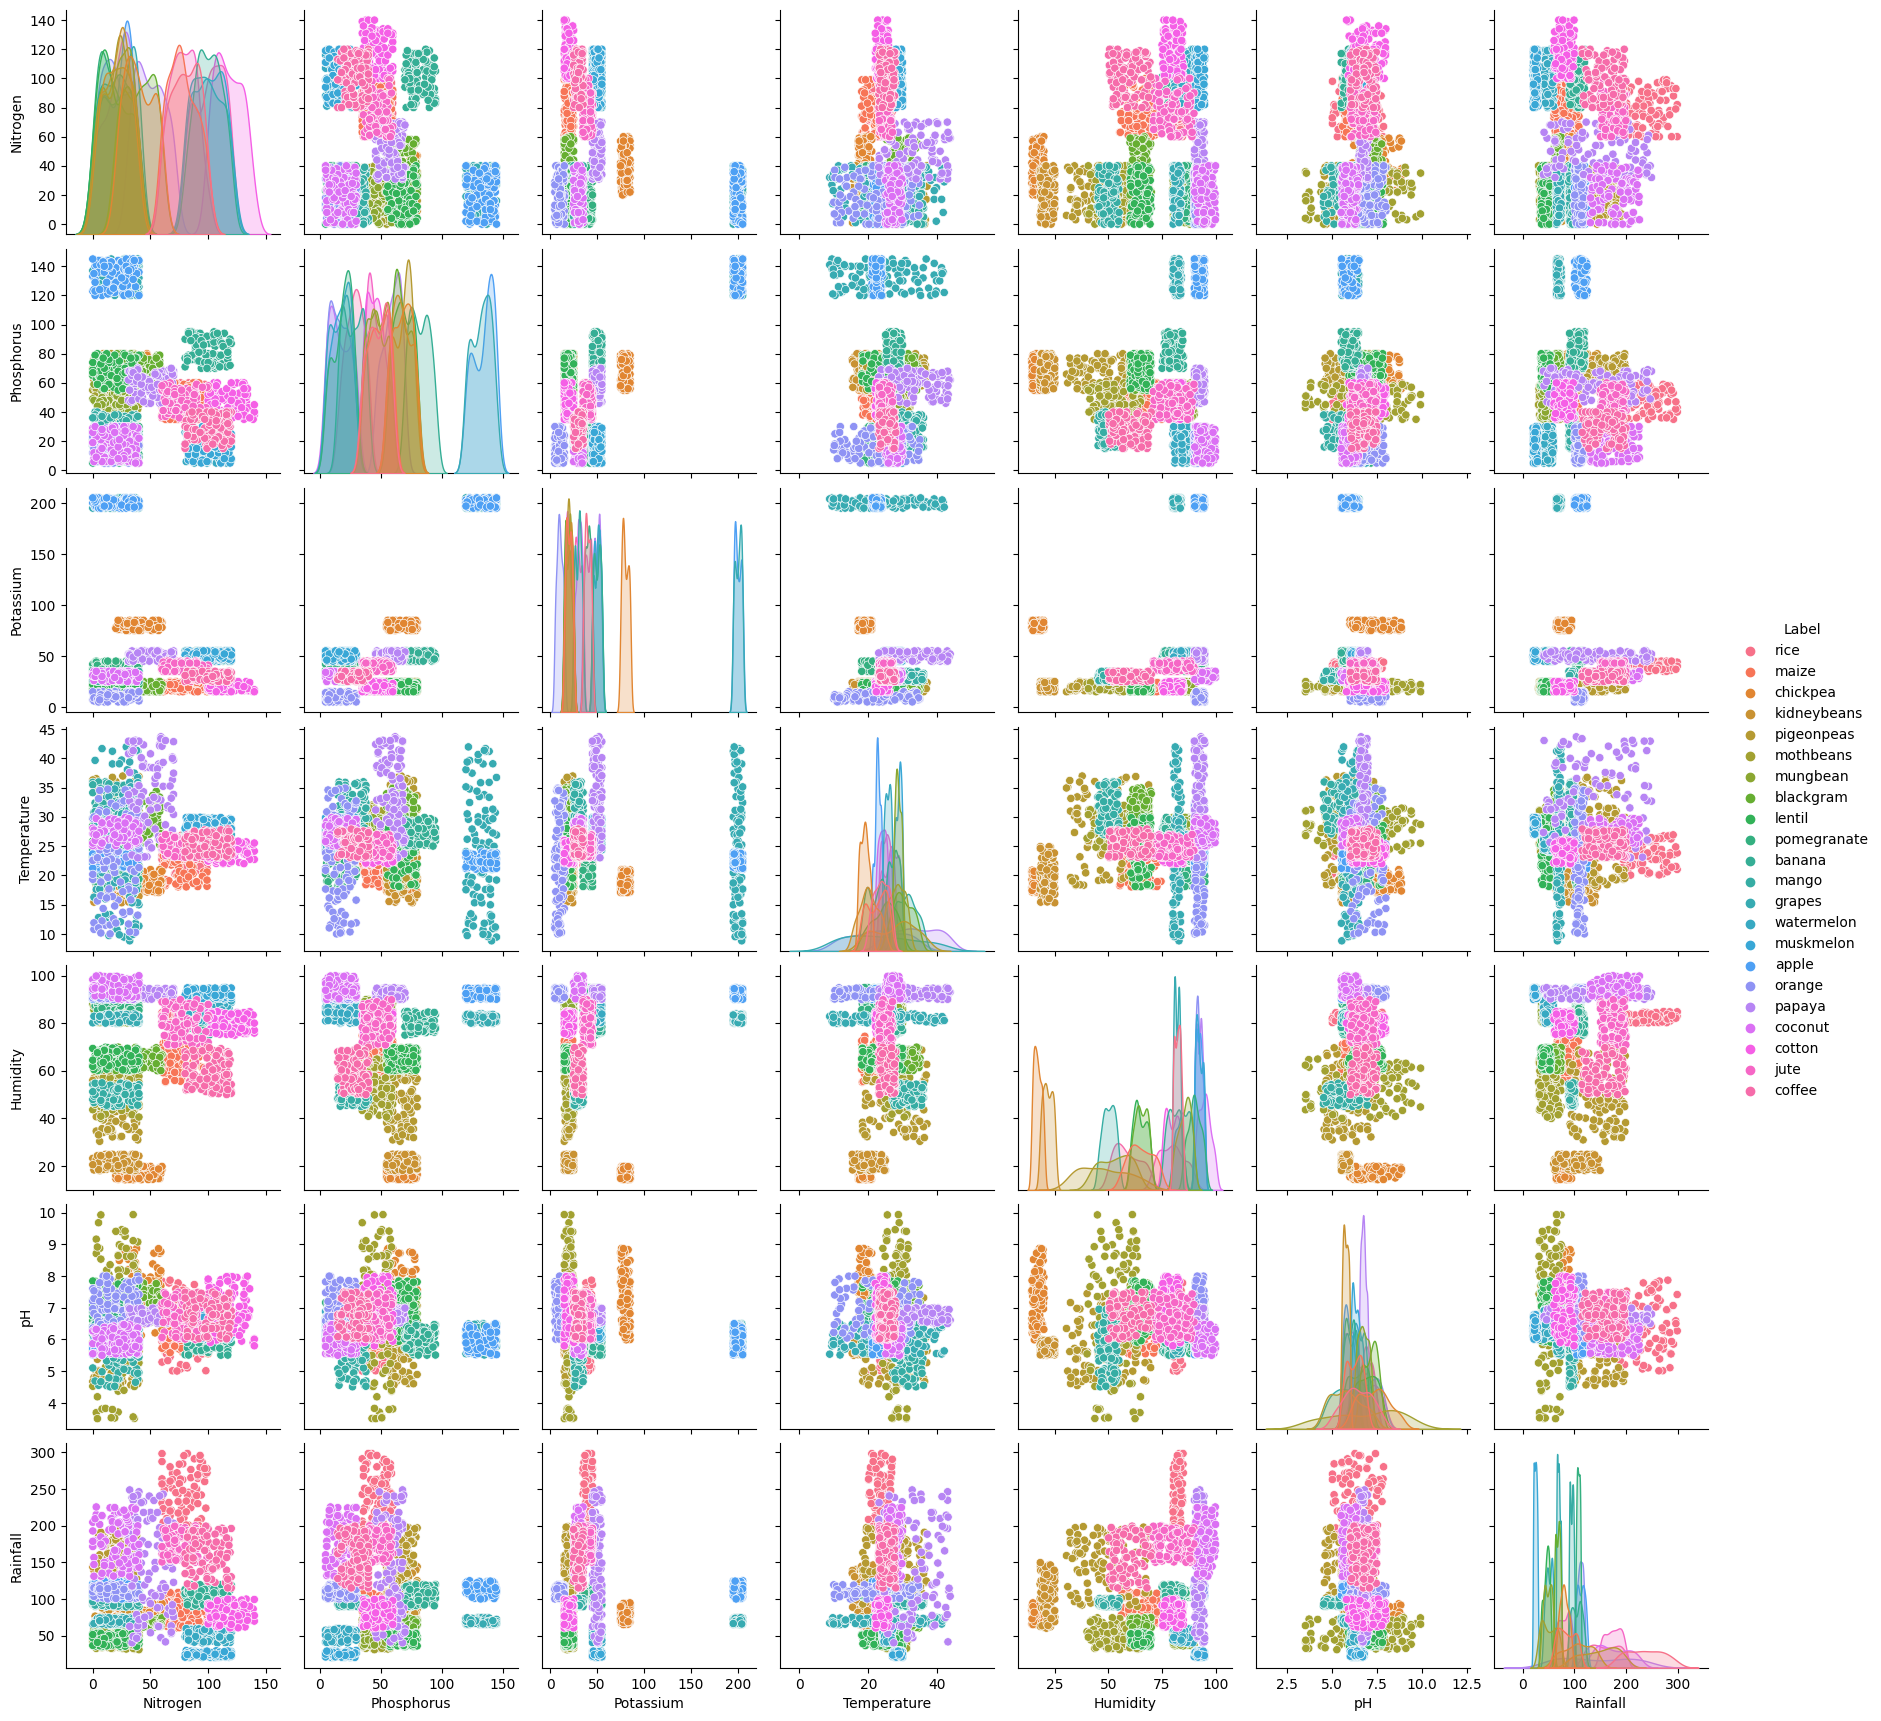

In [ ]:
sns.pairplot(data=df,hue='Label')
plt.show()

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.fillna(0, inplace=True)

<Axes: >

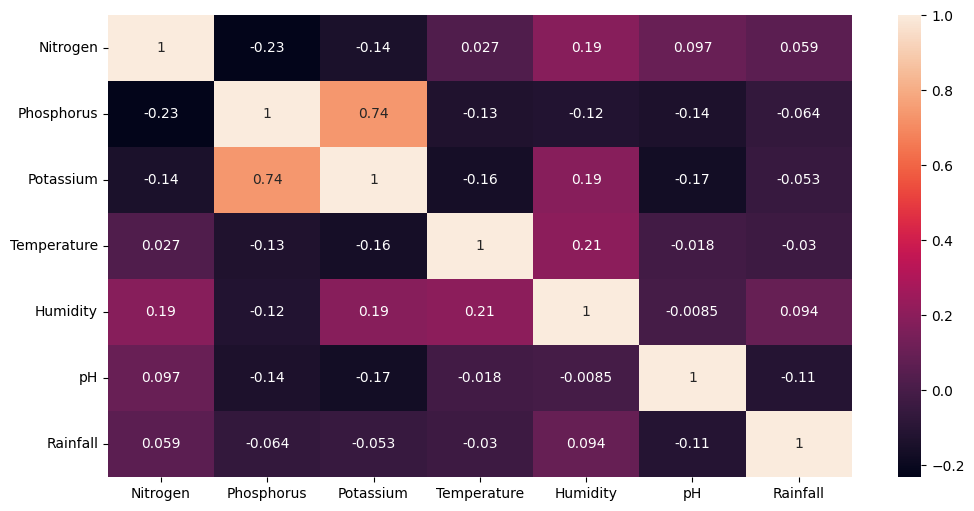

In [ ]:
figure=plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(),annot=True,)

In [ ]:
from sklearn.decomposition import PCA
# from sklearn.model_selection import train_test_split

pca=PCA(n_components=2)
df_pca=pca.fit_transform(df.drop(['Label'],axis=1))
df_pca=pd.DataFrame(df_pca)
fig=px.scatter(x=df_pca[0],y=df_pca[1],color=df['Label'],title='Decomposed using PCA')
fig.show()

In [ ]:
pca2=PCA(n_components=3)
df_pca2=pca2.fit_transform(df.drop(['Label'],axis=1))
df_pca2=pd.DataFrame(df_pca2)
fig=px.scatter_3d(x=df_pca2[0],y=df_pca2[1],z=df_pca2[2],color=df['Label'],title="Variance ecplained;")
fig.show()

In [ ]:
fig = px.scatter (x=df['Nitrogen'],y=df['Phosphorus'],color=df['Label'],title="Nitrogen VS phosphorus")
fig.show()

In [ ]:
fig=px.scatter(x=df['Phosphorus'],y=df['Potassium'],color=df['Label'],title='Phosphorus VS Potassium')
fig.show ()

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
names=df['Label'].unique()
# encoder =LabelEncoder()
# df['Label']=encoder.fit_transform(df['Label'])
df.head()

Nitrogen  Phosphorus  Potassium  Temperature   Humidity        pH  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     Rainfall Label  
0  202.935536  rice  
1  226.655537  rice  
2  263.964248  rice  
3  242.864034  rice  
4  262.717340  rice

In [ ]:
df.to_csv('data.csv', index=False)
from google.colab import files

files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
x=df.drop(['Label'],axis=1)
y=df['Label']
# print(y.unique_values)

In [ ]:
scaler=StandardScaler()
xtrain=scaler.fit_transform(x)
xtrain=pd.DataFrame(xtrain,columns=x.columns)
xtrain.head()

Nitrogen  Phosphorus  Potassium  Temperature  Humidity        pH  Rainfall
0  1.068797   -0.344551  -0.101688    -0.935587  0.472666  0.043302  1.810361
1  0.933329    0.140616  -0.141185    -0.759646  0.397051  0.734873  2.242058
2  0.255986    0.049647  -0.081939    -0.515898  0.486954  1.771510  2.921066
3  0.635298   -0.556811  -0.160933     0.172807  0.389805  0.660308  2.537048
4  0.743673   -0.344551  -0.121436    -1.083647  0.454792  1.497868  2.898373

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xtrain, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
clf_1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)

In [ ]:
clf_1.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

In [ ]:
accuracy = clf_1.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.990909090909091


In [ ]:
# # Assuming you have a model named clf_1
# # Create a list or NumPy array with 7 input values
# input_data =[0.445642,   -0.253582,  -0.200431,    -0.480212,.570524,  1.073884,2.865070]

# # You may need to reshape the input data depending on the model's requirements
# # For example, if your model expects a 2D input, you can reshape it like this:
# # input_data = np.array(input_data).reshape(1, 7)

# # Make predictions using the model
# predictions = clf_1.predict([input_data])

# # The 'predictions' variable will now contain the model's output based on the 7 inputs
# print("Model Predictions:", predictions)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming you have already fitted the StandardScaler on your training data
# scaler.fit(X_train)  # X_train is your training data

# Collect user input as a list or array
user_data =[94,  53,40,20,82,5,241]
# Replace user_value1, user_value2, and so on with the actual user input values.

# You may need to reshape the input data if the scaler expects a 2D input
# For example, if your training data was 2D, you can reshape the user_input like this:
# user_input = [user_input]  # Convert to 2D array

# Apply the StandardScaler to user input data
scaled_user_input = scaler.transform([user_data])
input_data = np.array(scaled_user_input).reshape(1, 7)
predictio = clf_1.predict(input_data)

# Now, scaled_user_input contains the scaled input values.
# You can use these scaled values for making predictions with your model.
print("Model Predictions:", predictio)
# print(input_data)


Model Predictions: ['rice']


In [ ]:
clf_2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5, random_state=42)

clf_2.fit(x_train,y_train)

accuracy_2 = clf_2.score(x_test, y_test)
print("Accuracy:", accuracy_2)

Accuracy: 0.9818181818181818


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# from sklearn.model_selection import GridSearchCV
# import random

# Create an AdaBoostClassifier
classifier = AdaBoostClassifier()

# Define the hyperparameter grid with random values
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of base estimators (decision trees)
    'learning_rate': [0.1, 0.01, 0.001],  # Learning rate
    'algorithm': ['SAMME', 'SAMME.R']  # Algorithm used for boosting
}

# Create GridSearchCV with the AdaBoostClassifier and parameter grid
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model with the optimal hyperparameters
best_model = grid_search.best_estimator_

# Calculate and print the accuracy on the test dataset
accuracy = best_model.score(x_test, y_test)
print("Accuracy on the test dataset:", accuracy)


NameError: ignored